
Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

In [220]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [221]:
df.isna().sum()   # Se observan la cantidad de datos nulos por cada columna

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [223]:
df.dropna(axis=0, inplace=True, ignore_index=True)   # Se limpian los datos eliminando los valores nulos
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?

In [224]:
especies = df.species.unique()
print('Cantidad de especies diferentes de pingüinos:', len(especies))

Cantidad de especies diferentes de pingüinos: 3


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?


In [225]:
adelie = df[df['species']=='Adelie']['bill_length_mm'].mean()
print('Longitud promedio del pico de los pingüinos Adelie: ', adelie, 'mm')

Longitud promedio del pico de los pingüinos Adelie:  38.82397260273973 mm


3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?


In [226]:
gentoo = df[df['species']=='Gentoo']['body_mass_g'].mean()
print('Masa corporal promedio de los pingüinos Gentoo: ', gentoo, 'g')

Masa corporal promedio de los pingüinos Gentoo:  5092.436974789916 g


4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?


In [227]:
coe_corr, n = pearsonr(df['bill_length_mm'], df['body_mass_g'])
print('El coeficiente de relación entre longitud del pico y la masa corporal es de: ',coe_corr)

El coeficiente de relación entre longitud del pico y la masa corporal es de:  0.5894511101769491


5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?


In [228]:
islas = df['island'].value_counts()
islas

,count
island,
Biscoe,163
Dream,123
Torgersen,47


In [229]:
imax = df['island'].value_counts().idxmax()
print('La isla con mayor número de pingüinos es: ',imax)

La isla con mayor número de pingüinos es:  Biscoe


6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?


In [230]:
desviacion = df[df['species']=='Chinstrap']['flipper_length_mm'].std()
print('Desviación estándar: ',desviacion)

Desviación estándar:  7.131894258578147


7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?


In [231]:
picolargo = df['bill_length_mm'].max()
pinguino = df.loc[df['bill_length_mm']==picolargo]
pinguino

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
246,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?


In [232]:
proporcion = df[df['species']=='Adelie']
proporcion1 = proporcion['sex'].value_counts()/len(df)
proporcion1

,count
sex,
Male,0.219219
Female,0.219219


9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?


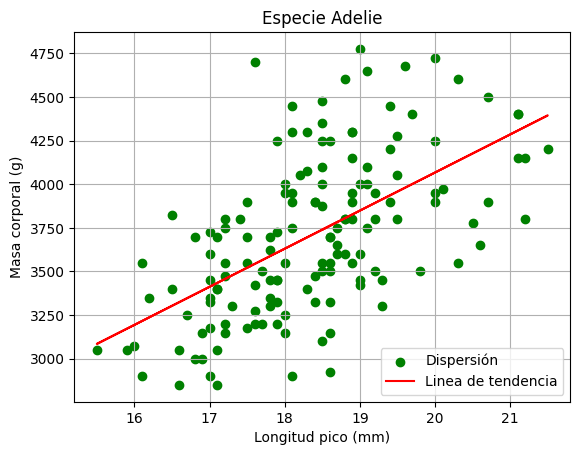

In [233]:
ping_adelie = df[df['species']=='Adelie']
plt.scatter(ping_adelie['bill_depth_mm'], ping_adelie['body_mass_g'], color='green', label='Dispersión')

coeficientes = np.polyfit(ping_adelie['bill_depth_mm'], ping_adelie['body_mass_g'], 1)
linea_tendencia = np.polyval(coeficientes, ping_adelie['bill_depth_mm'])
plt.plot(ping_adelie['bill_depth_mm'], linea_tendencia, color='red', label='Linea de tendencia')

plt.legend()
plt.title('Especie Adelie')
plt.xlabel('Longitud pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.grid()
plt.show()

In [234]:
coe_corradelie, n = pearsonr(ping_adelie['bill_length_mm'],ping_adelie['body_mass_g'])
print('Coeficiente de correlación entre longitud del pico y masa corporal especie Adelie es: ',coe_corradelie)

Coeficiente de correlación entre longitud del pico y masa corporal especie Adelie es:  0.5442764102182448


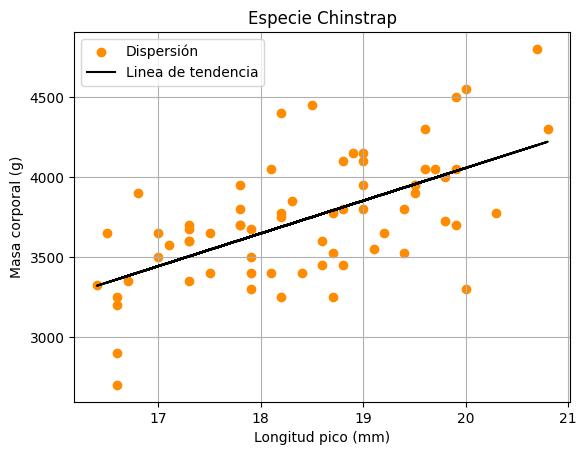

In [235]:
ping_chinstrap = df[df['species']=='Chinstrap']
plt.scatter(ping_chinstrap['bill_depth_mm'], ping_chinstrap['body_mass_g'], color='darkorange', label='Dispersión')

coeficientes = np.polyfit(ping_chinstrap['bill_depth_mm'], ping_chinstrap['body_mass_g'], 1)
linea_tendencia = np.polyval(coeficientes, ping_chinstrap['bill_depth_mm'])
plt.plot(ping_chinstrap['bill_depth_mm'], linea_tendencia, color='black', label='Linea de tendencia')

plt.legend()
plt.title('Especie Chinstrap')
plt.xlabel('Longitud pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.grid()
plt.show()

In [236]:
coe_corrchinstrap, n = pearsonr(ping_chinstrap['bill_length_mm'],ping_chinstrap['body_mass_g'])
print('Coeficiente de correlación entre longitud del pico y masa corporal especie Chinstrap es: ',coe_corrchinstrap)

Coeficiente de correlación entre longitud del pico y masa corporal especie Chinstrap es:  0.5136383479489104


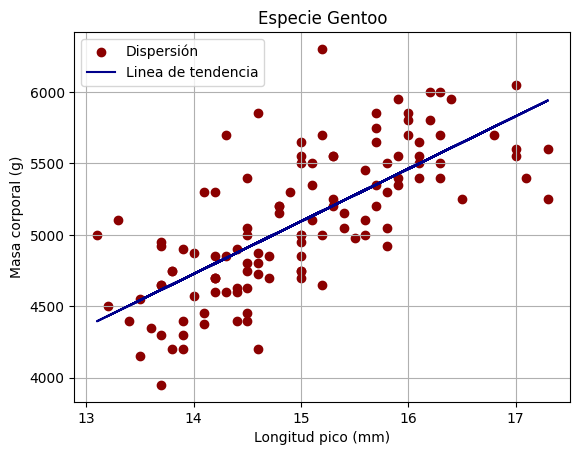

In [237]:
ping_gentoo = df[df['species']=='Gentoo']
plt.scatter(ping_gentoo['bill_depth_mm'], ping_gentoo['body_mass_g'], color='darkred', label='Dispersión')

coeficientes = np.polyfit(ping_gentoo['bill_depth_mm'], ping_gentoo['body_mass_g'], 1)
linea_tendencia = np.polyval(coeficientes, ping_gentoo['bill_depth_mm'])
plt.plot(ping_gentoo['bill_depth_mm'], linea_tendencia, color='darkblue', label='Linea de tendencia')

plt.legend()
plt.title('Especie Gentoo')
plt.xlabel('Longitud pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.grid()
plt.show()

In [238]:
coe_corrgentoo, n = pearsonr(ping_gentoo['bill_length_mm'],ping_gentoo['body_mass_g'])
print('Coeficiente de correlación entre longitud del pico y masa corporal especie Gentoo es: ',coe_corrgentoo)

Coeficiente de correlación entre longitud del pico y masa corporal especie Gentoo es:  0.6667302222195614


10. ¿Cuál es la distribución de la masa corporal entre las especies de
pingüinos?


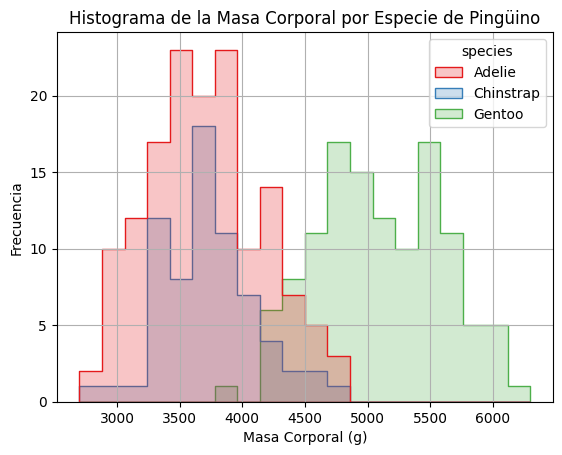

In [239]:
sns.histplot(data=df, x='body_mass_g', hue='species', bins=20, element='step', palette='Set1')

plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Masa Corporal por Especie de Pingüino')
plt.grid()
plt.show()

In [240]:
print('Desviación estándar de las características de los pingüinos: ')
desviacion_estandar = df.describe().loc['std']
desviacion_estandar

Desviación estándar de las características de los pingüinos: 


,std
bill_length_mm,5.468668
bill_depth_mm,1.969235
flipper_length_mm,14.015765
body_mass_g,805.215802


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?


In [241]:
aleta_max = df['flipper_length_mm'].max()
aleta_min = df['flipper_length_mm'].min()
print('La longitud mínima de la aleta entre las tres especied de pingüinos es: ', aleta_min, 'mm')
print('La longitud máxima de la aleta entre las tres especied de pingüinos es: ', aleta_max, 'mm')

La longitud mínima de la aleta entre las tres especied de pingüinos es:  172.0 mm
La longitud máxima de la aleta entre las tres especied de pingüinos es:  231.0 mm


12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?


In [242]:
masa = len(df[df['body_mass_g']>5000])
print('La cantidad de pingüinos con masa corporal > 5000 g es de: ',masa, 'pingüinos')

La cantidad de pingüinos con masa corporal > 5000 g es de:  61 pingüinos


13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [243]:
pico_adelie = ping_adelie['bill_length_mm'].mean()
pico_chinstrap = ping_chinstrap['bill_length_mm'].mean()
pico_gentoo = ping_gentoo['bill_length_mm'].mean()
print('Longitud promedio del pico de la especie Adelie: ', pico_adelie, 'mm')
print('Longitud promedio del pico de la especie Chinstrap: ', pico_chinstrap, 'mm')
print('Longitud promedio del pico de la especie Gentoo: ', pico_gentoo, 'mm')
print()
print('Calculando el promedio de la longitud de los picos podemos evidenciar qué especie tiene en promedio los picos más largos (Chinstrap)')

Longitud promedio del pico de la especie Adelie:  38.82397260273973 mm
Longitud promedio del pico de la especie Chinstrap:  48.83382352941177 mm
Longitud promedio del pico de la especie Gentoo:  47.568067226890754 mm

Calculando el promedio de la longitud de los picos podemos evidenciar qué especie tiene en promedio los picos más largos (Chinstrap)


14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

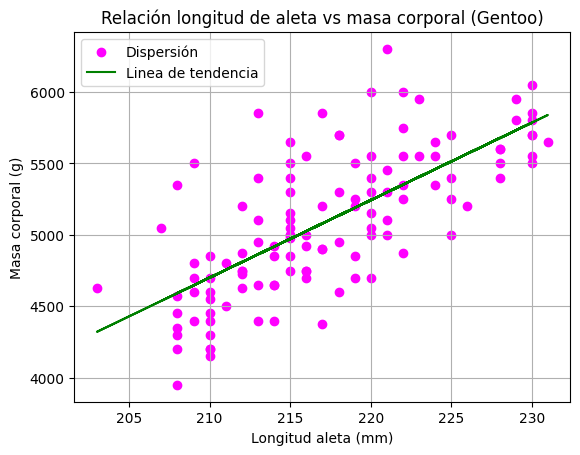

In [244]:
plt.scatter(ping_gentoo['flipper_length_mm'], ping_gentoo['body_mass_g'], color='fuchsia', label = 'Dispersión')

coeficientes = np.polyfit(ping_gentoo['flipper_length_mm'], ping_gentoo['body_mass_g'], 1)
linea_tendencia = np.polyval(coeficientes, ping_gentoo['flipper_length_mm'])
plt.plot(ping_gentoo['flipper_length_mm'], linea_tendencia, color='green', label='Linea de tendencia')

plt.xlabel('Longitud aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.title('Relación longitud de aleta vs masa corporal (Gentoo)')
plt.grid()
plt.legend()
plt.show()

In [245]:
coe_corrgentoo, n = pearsonr(ping_gentoo['flipper_length_mm'],ping_gentoo['body_mass_g'])
print('Coeficiente de correlación entre longitud de la aleta y masa corporal especie Gentoo es: ',coe_corrgentoo)

Coeficiente de correlación entre longitud de la aleta y masa corporal especie Gentoo es:  0.7113052561445223


15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

In [246]:
df1 = sns.load_dataset('penguins')   # Se vuelve a cargar el dataframe con los datos originales (incluyendo los valores nulos)

In [247]:
falta_datos = df1.isna().sum().sum()
print('Hay ', falta_datos, 'pingüinos a los cuales le faltan datos')

Hay  19 pingüinos a los cuales le faltan datos


16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [248]:
desviacion_estandar_picos_islas = df.groupby('island')['bill_length_mm'].std()

isla_variacion_max = desviacion_estandar_picos_islas.idxmax()

print('La isla con mayor variación en la longitud del pico es: ',isla_variacion_max)
print(desviacion_estandar_picos_islas)

La isla con mayor variación en la longitud del pico es:  Dream
island
Biscoe       4.827319
Dream        5.947069
Torgersen    3.028097
Name: bill_length_mm, dtype: float64


17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

In [249]:
masa_machos_hembras = ping_chinstrap.groupby('sex')['body_mass_g'].mean()
print('Masa corporal promedio de machos y hembras: \n',masa_machos_hembras)
diferencia = 3938.970588 - 3527.205882
print('La masa promedio de los machos es mayor que la masa promedio de las hembras y la diferencia es de: ', diferencia, 'g')

Masa corporal promedio de machos y hembras: 
 sex
Female    3527.205882
Male      3938.970588
Name: body_mass_g, dtype: float64
La masa promedio de los machos es mayor que la masa promedio de las hembras y la diferencia es de:  411.76470599999993 g


18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

In [250]:
aleta_promedio_max = df.groupby('species')['flipper_length_mm'].mean()
print(aleta_promedio_max)
print('La longitud de la aleta promedio más alta es de la especie Gentoo')

species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64
La longitud de la aleta promedio más alta es de la especie Gentoo


19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?


In [251]:
picopequeño = df['bill_length_mm'].min()
pinguinop = df.loc[df['bill_length_mm']==picopequeño]
pinguinop

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
136,Adelie,Dream,32.1,15.5,188.0,3050.0,Female


20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

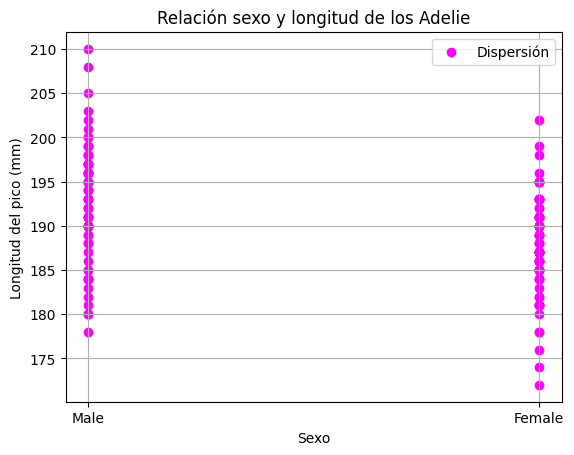

In [252]:
plt.scatter(ping_adelie['sex'], ping_adelie['flipper_length_mm'], color = 'fuchsia', label = 'Dispersión')
plt.title('Relación sexo y longitud de los Adelie')
plt.xlabel('Sexo')
plt.ylabel('Longitud del pico (mm)')
plt.legend()
plt.grid()
plt.show()

In [253]:
relacion_sexo_pico = df[df.species=="Adelie"].flipper_length_mm.corr(df[df.species=="Adelie"].sex.astype('category').cat.codes)
print('La relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie es: ',relacion_sexo_pico)

La relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie es:  0.3551406136852862
